In [1]:
from conf import ONION_DIR
import os
import ast

import pandas as pd
from conf import DATA_DIR

from sklearn import mixture
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
track_dataframes = []
for subdir, dirs, files in os.walk(ONION_DIR):
    for file in files:
        track_dataframe = pd.read_csv(os.path.join(subdir, file), sep='\t')
        track_dataframes += [track_dataframe]

In [3]:
onion_to_compare = pd.concat(track_dataframes)
onion_to_compare['gems_profile'] = onion_to_compare['gems_profile'].apply(lambda x: ast.literal_eval(x))
onion_to_compare = onion_to_compare.set_index('id')
onion_to_compare = pd.merge(onion_to_compare, onion_to_compare['gems_profile'].apply(pd.Series).fillna(value=0.), right_index=True, left_index=True).reset_index(drop=False)
onion_to_compare = onion_to_compare.drop(columns=['gems', 'genre', 'album_name', 'popularity', 'gems_profile', 'popularity class'])

In [4]:
rename_columns = {
    'id': 'song_code',
    'microgenre': 'genre',
    'song': 'title',
    'tenderness': 'tend',
    'peacefulness': 'peac',
    'joyful activation': 'joya',
    'wonder': 'wond',
    'power': 'ener',
    'nostalgia': 'nost',
    'tension': 'tens',
    'sadness': 'sadn',
    'transcendence': 'tran',
}
onion_to_compare = onion_to_compare.rename(columns=rename_columns)

In [5]:
rename_microgenres = {
    'trance': 'trance',
    'soft rock': 'rock',
    'soul': 'soul',
    'smooth jazz': 'jazz',
    'indie pop': 'pop',
    'swing': 'swing',
    'pop punk': 'punk',
    'dubstep': 'dubstep',
    'europop': 'europop',
    'doom metal': 'metal',
    'funk': 'funk',
    'downtempo': 'downtempo',
    'ballad': 'ballad',
    'disco': 'disco',
    'bossa nova': 'nova',
}
onion_to_compare.genre = onion_to_compare.genre.map(rename_microgenres)

In [6]:
onion_to_compare = onion_to_compare[['song_code', 'wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener',
       'sadn', 'tens', 'title', 'artist', 'genre']]

In [7]:
onion_to_compare.to_csv(DATA_DIR + 'onion_to_compare.csv', index=False)

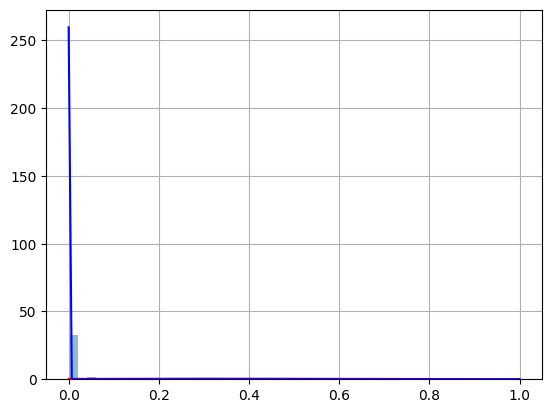

In [8]:
gems_9 = ['wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener', 'sadn', 'tens']
f = onion_to_compare[gems_9].to_numpy().flatten().reshape(-1, 1)

g = mixture.GaussianMixture(n_components=2, covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_

plt.hist(f, bins=50, histtype='bar', density=True, alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis, weights[0] * stats.norm.pdf(f_axis, means[0], np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis, weights[1] * stats.norm.pdf(f_axis, means[1], np.sqrt(covars[1])).ravel(), c='blue')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [9]:
# sparsity of emotion tags

In [10]:
(f == 0.).sum() / len(f)

0.6514594064262939

In [11]:
threshold = 0.
onion_to_compare[gems_9] = (onion_to_compare[gems_9] > threshold) * 1.
onion_to_compare.to_csv(DATA_DIR + 'onion_bin_to_compare.csv', index=False)

In [13]:
(onion_to_compare[gems_9] == 0.).sum().sum()

2656

In [24]:
(onion_to_compare[gems_9] == 1.).sum().sum()

1421

In [25]:
onion_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
0,6aKbiXwwBszPw6HM,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Find (Andy Moor Remix),Ridgewalkers,trance
1,EtYe8YWsGvZmeRYM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alchemy,Above & Beyond,trance
2,04q3VppIQEET5rzy,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
3,8BjY1ZEA6OnEoUYk,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,R.I.P.,September,trance
4,jyMudL0rTgO4ecto,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Build The Cities (feat. Kerli),Karma Fields,trance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,x9iYvZSa8hQpBgHJ,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Tropicalia,Beck,nova
449,2RgPyroR10XSHhEt,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"Mas, Que Nada!",Jorge Ben Jor,nova
450,y1Vp4R9jiSUAVnMP,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Agua De Beber,Astrud Gilberto,nova
451,x2aYFIYlehHBrA32,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Know You Now,Amy Winehouse,nova
